In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Reading train and test CSV files
train_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/train.csv')
test_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/test.csv')

# Drop data that doesn't have 'sii'
train_df = train_df.dropna(subset=['sii'])

# Drop columns that contain 'PCIAT', except 'PCIAT-PCIAT_Total'
# cols_to_drop = [col for col in train_df.columns if 'PCIAT' in col and col != 'PCIAT-PCIAT_Total']
# train_df = train_df.drop(cols_to_drop, axis=1)
# Drop columns that contain 'Season'
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='Season')))]

train_df = train_df.drop(['id'], axis=1)
train_df = pd.get_dummies(train_df)

X = train_df.drop(['sii'], axis=1)
y = train_df['PCIAT-PCIAT_Total']
y_sii = train_df['sii']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train = X


# Impute missing values in the training data
knn_imputer = KNNImputer(n_neighbors=3)
X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
# X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)

# Standardize the imputed data
scaler = StandardScaler()  # or MinMaxScaler() if you prefer scaling between 0 and 1
X_train_imputed = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
# X_test_imputed = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

In [20]:
X_train_imputed.head(5)

Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
0        -1.528487        -0.757178        -1.271111     -0.365874   
1        -0.361407        -0.757178        -0.265824     -0.899421   
2        -0.069637         1.320694         0.502924     -0.408798   
3        -0.361407        -0.757178         0.502924     -0.100195   
4         0.805674         1.320694        -1.359813      0.648497   

   Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
0        -1.360947        -0.862362                     -0.914861   
1        -1.086840        -0.974238                     -1.149076   
2         0.078113        -0.284337                     -0.212215   
3         0.009586        -0.144492                      0.100072   
4         0.489273         0.568715                      0.646575   

   Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  ...  \
0               0.234456           -0.021259             -0.069868  ...   
1               0.384795           -0.891607              0.289379  ...   
2              -0.366900            0.898824             -0.009994  ...   
3              -0.742747            1.122628             -0.009994  ...   
4              -0.742747           -0.667803             -0.908112  ...   

   PCIAT-PCIAT_15  PCIAT-PCIAT_16  PCIAT-PCIAT_17  PCIAT-PCIAT_18  \
0        1.675675        1.705698        1.638958        1.562618   
1       -1.004621       -0.970597       -1.126642       -1.055862   
2       -0.334547       -0.970597        0.256158        0.253378   
3       -1.004621        1.036624        1.638958        0.907998   
4        0.335527       -0.301523        0.947558       -0.401242   

   PCIAT-PCIAT_19  PCIAT-PCIAT_20  PCIAT-PCIAT_Total  SDS-SDS_Total_Raw  \
0        0.626607        2.580120           1.332856          -0.317264   
1       -0.863310       -0.796011          -1.371823           0.520542   
2       -0.118351        0.048022           0.005105          -0.283752   
3        2.116525        0.048022           0.791920          -0.987509   
4        0.626607        0.048022           0.300160          -0.082678   

   SDS-SDS_Total_T  PreInt_EduHx-computerinternet_hoursday  
0        -0.325578                                1.848119  
1         0.515600                               -0.945673  
2        -0.273004                                0.916855  
3        -0.982747                               -0.945673  
4        -0.115283                               -0.945673  

[5 rows x 69 columns]

In [21]:
import numpy as np
indices = y_sii[y_sii == 3].index
print(y.loc[indices])
np.min(y.loc[indices])

indices_2 = y_sii[y_sii == 2].index
print(y.loc[indices_2])
np.max(y.loc[indices_2])


191     81.0
255     81.0
306     89.0
370     92.0
405     80.0
487     81.0
868     87.0
894     89.0
1076    92.0
1107    85.0
1454    91.0
1502    81.0
1860    88.0
1907    82.0
2002    87.0
2005    81.0
2036    83.0
2263    90.0
2316    92.0
2331    83.0
2504    93.0
2527    88.0
2541    88.0
2689    87.0
2691    88.0
2731    89.0
2828    83.0
2860    84.0
2935    88.0
3030    81.0
3074    80.0
3223    92.0
3460    85.0
3494    80.0
Name: PCIAT-PCIAT_Total, dtype: float64
0       55.0
15      58.0
23      51.0
28      50.0
38      51.0
        ... 
3905    73.0
3927    50.0
3939    55.0
3941    68.0
3946    77.0
Name: PCIAT-PCIAT_Total, Length: 378, dtype: float64


79.0

In [22]:
test_df.head(5)

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  BIA-BIA_TBW  PAQ_A-Season  PAQ_A-PAQ_A_Total  \
0             50.8  ...      32.6909           NaN                NaN   
1             46.0  ...      27.0552           NaN                NaN   
2             75.6  ...          NaN           NaN                NaN   
3             81.6  ...      45.9966           NaN                NaN   
4              NaN  ...          NaN        Summer               1.04   

   PAQ_C-Season PAQ_C-PAQ_C_Total  SDS-Season  SDS-SDS_Total_Raw  \
0           NaN               NaN         NaN                NaN   
1          Fall             2.340        Fall               46.0   
2        Summer             2.170        Fall               38.0   
3        Winter             2.451      Summer               31.0   
4           NaN               NaN         NaN                NaN   

   SDS-SDS_Total_T PreInt_EduHx-Season  PreInt_EduHx-computerinternet_hoursday  
0              NaN                Fall                                     3.0  
1             64.0              Summer                                     0.0  
2             54.0              Summer                                     2.0  
3             45.0              Winter                                     0.0  
4              NaN                 NaN                                     NaN  

[5 rows x 59 columns]

In [23]:
# Corrected code

import numpy as np
import pandas as pd

# Assuming X_train_imputed is already defined in your script
corr_matrix = X_train_imputed.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
high_corr_pairs = [(col, row) for col in upper.columns for row in upper.index if upper.loc[row, col] > 0.95]
print(high_corr_pairs)

[('BIA-BIA_BMR', 'BIA-BIA_BMC'), ('BIA-BIA_DEE', 'BIA-BIA_BMC'), ('BIA-BIA_DEE', 'BIA-BIA_BMR'), ('BIA-BIA_ECW', 'BIA-BIA_BMC'), ('BIA-BIA_ECW', 'BIA-BIA_BMR'), ('BIA-BIA_ECW', 'BIA-BIA_DEE'), ('BIA-BIA_FFM', 'BIA-BIA_BMC'), ('BIA-BIA_FFM', 'BIA-BIA_BMR'), ('BIA-BIA_FFM', 'BIA-BIA_DEE'), ('BIA-BIA_FFM', 'BIA-BIA_ECW'), ('BIA-BIA_Fat', 'BIA-BIA_BMC'), ('BIA-BIA_Fat', 'BIA-BIA_BMR'), ('BIA-BIA_Fat', 'BIA-BIA_DEE'), ('BIA-BIA_Fat', 'BIA-BIA_ECW'), ('BIA-BIA_Fat', 'BIA-BIA_FFM'), ('BIA-BIA_ICW', 'BIA-BIA_BMC'), ('BIA-BIA_ICW', 'BIA-BIA_BMR'), ('BIA-BIA_ICW', 'BIA-BIA_DEE'), ('BIA-BIA_ICW', 'BIA-BIA_ECW'), ('BIA-BIA_ICW', 'BIA-BIA_FFM'), ('BIA-BIA_ICW', 'BIA-BIA_Fat'), ('BIA-BIA_LDM', 'BIA-BIA_BMC'), ('BIA-BIA_LDM', 'BIA-BIA_BMR'), ('BIA-BIA_LDM', 'BIA-BIA_DEE'), ('BIA-BIA_LDM', 'BIA-BIA_ECW'), ('BIA-BIA_LDM', 'BIA-BIA_FFM'), ('BIA-BIA_LDM', 'BIA-BIA_Fat'), ('BIA-BIA_LDM', 'BIA-BIA_ICW'), ('BIA-BIA_LST', 'BIA-BIA_BMR'), ('BIA-BIA_LST', 'BIA-BIA_DEE'), ('BIA-BIA_LST', 'BIA-BIA_ECW'), ('BIA-B

In [24]:

import numpy as np
import pandas as pd

# Assuming X_train_imputed is already defined in your script
corr_matrix = X_train_imputed.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Alternatively, more efficient way: remove only the most correlated pair's latter feature
for col in upper.columns:
    if any(upper[col] > 0.95):
        # If there is one element, it should be removed from to_drop list before adding
        if col not in to_drop:
            to_drop.append(col)

# Drop features
X_train_imputed_dropped = X_train_imputed.drop(columns=to_drop)

print("Dropped features:", to_drop)
print("Remaining features:", X_train_imputed_dropped.columns.tolist())


Dropped features: ['BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'SDS-SDS_Total_T']
Remaining features: ['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Frame_num', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02', 'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 

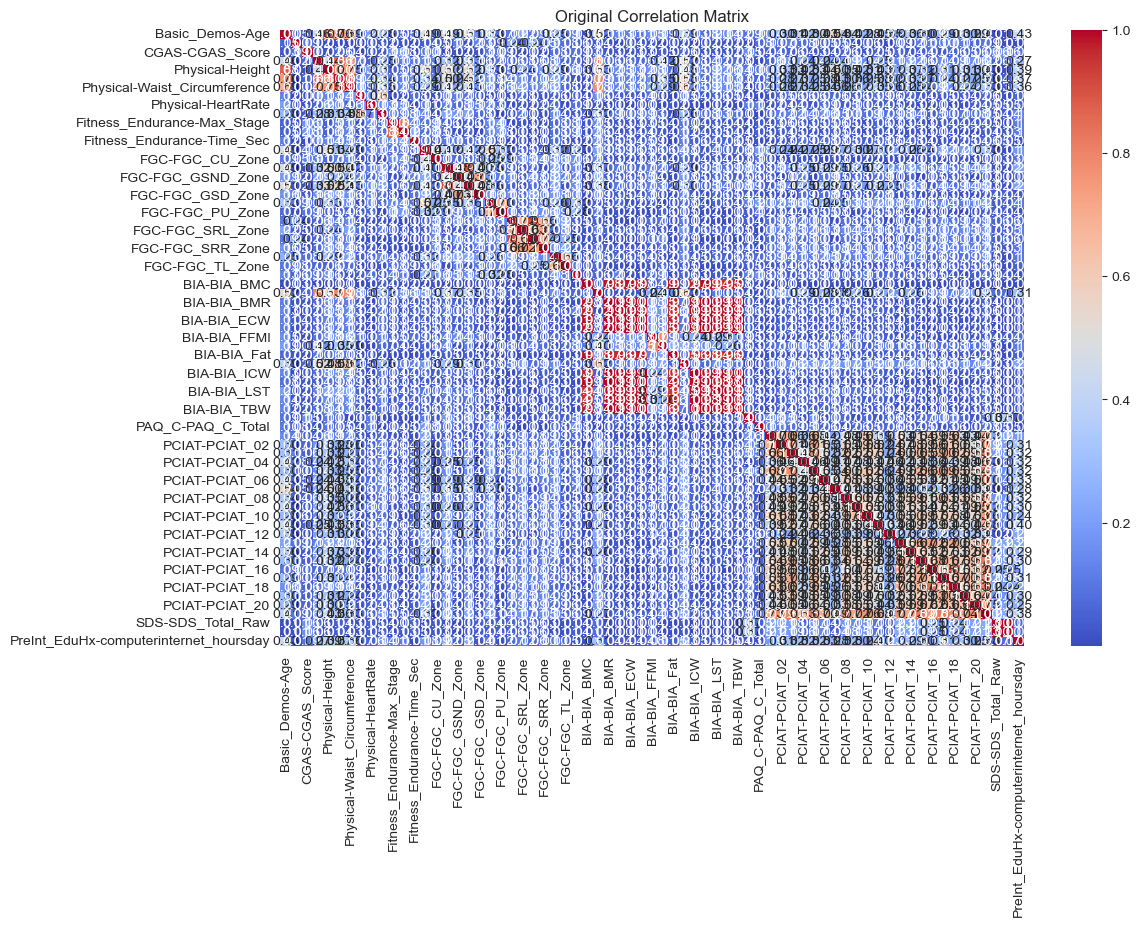

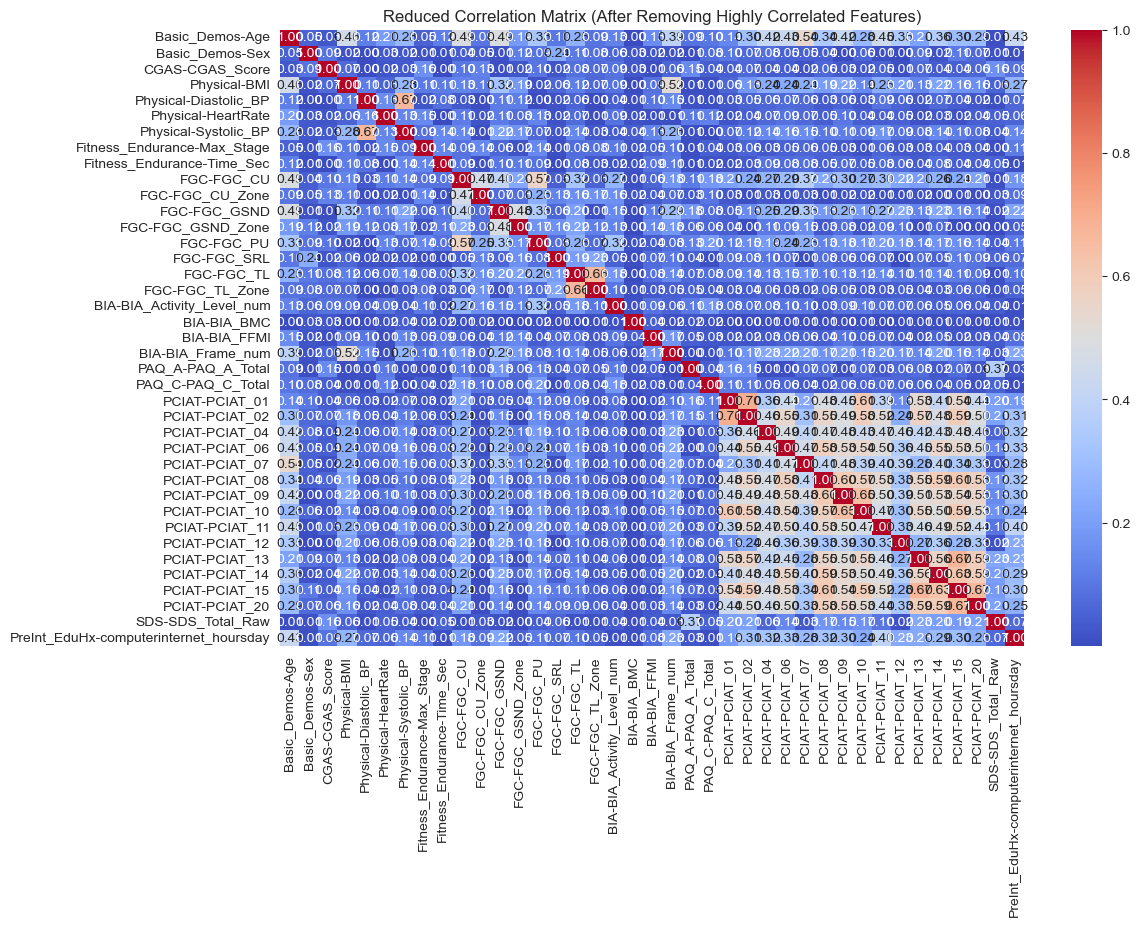

Features dropped due to high correlation:
Physical-Height
Physical-Weight
Physical-Waist_Circumference
Fitness_Endurance-Time_Mins
FGC-FGC_GSD
FGC-FGC_GSD_Zone
FGC-FGC_PU_Zone
FGC-FGC_SRL_Zone
FGC-FGC_SRR
FGC-FGC_SRR_Zone
BIA-BIA_BMI
BIA-BIA_BMR
BIA-BIA_DEE
BIA-BIA_ECW
BIA-BIA_FFM
BIA-BIA_FMI
BIA-BIA_Fat
BIA-BIA_ICW
BIA-BIA_LDM
BIA-BIA_LST
BIA-BIA_SMM
BIA-BIA_TBW
PCIAT-PCIAT_03
PCIAT-PCIAT_05
PCIAT-PCIAT_16
PCIAT-PCIAT_17
PCIAT-PCIAT_18
PCIAT-PCIAT_19
PCIAT-PCIAT_Total
SDS-SDS_Total_T


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_imputed is already defined and is a DataFrame

# Find the largest correlation feature columns
correlation_matrix = X_train_imputed.corr().abs()
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)
to_drop = [
    column for column in upper_triangle.columns if any(upper_triangle[column] > 0.7)
]

# Remove the highly correlated features
X_train_reduced = X_train_imputed.drop(columns=to_drop)

# Plot heatmap of the original correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Original Correlation Matrix')
plt.show()

# Plot heatmap of the reduced correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(X_train_reduced.corr().abs(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Reduced Correlation Matrix (After Removing Highly Correlated Features)')
plt.show()

# Print the features that were dropped due to high correlation
print("Features dropped due to high correlation:")
for feature in to_drop:
    print(feature)

In [26]:
X_train_reduced.head(5)

Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
0        -1.528487        -0.757178        -1.271111     -0.365874   
1        -0.361407        -0.757178        -0.265824     -0.899421   
2        -0.069637         1.320694         0.502924     -0.408798   
3        -0.361407        -0.757178         0.502924     -0.100195   
4         0.805674         1.320694        -1.359813      0.648497   

   Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  \
0               0.234456           -0.021259             -0.069868   
1               0.384795           -0.891607              0.289379   
2              -0.366900            0.898824             -0.009994   
3              -0.742747            1.122628             -0.009994   
4              -0.742747           -0.667803             -0.908112   

   Fitness_Endurance-Max_Stage  Fitness_Endurance-Time_Sec  FGC-FGC_CU  ...  \
0                    -0.923443                   -0.571191   -1.118053  ...   
1                    -0.679120                   -0.155406   -0.844103  ...   
2                     0.053847                    0.468271    0.708284  ...   
3                     0.786815                    0.780109    0.525651  ...   
4                     0.053847                    0.702149   -0.022251  ...   

   PCIAT-PCIAT_09  PCIAT-PCIAT_10  PCIAT-PCIAT_11  PCIAT-PCIAT_12  \
0       -0.844007       -0.979347        1.500775       -0.468037   
1       -0.844007       -0.979347       -1.092291       -0.468037   
2       -0.048918       -0.228157       -0.444025       -0.468037   
3        0.746171        0.523032        0.852508       -0.468037   
4        0.746171       -0.228157       -1.092291        1.446087   

   PCIAT-PCIAT_13  PCIAT-PCIAT_14  PCIAT-PCIAT_15  PCIAT-PCIAT_20  \
0        1.886787        2.277955        1.675675        2.580120   
1       -0.950003       -0.796020       -1.004621       -0.796011   
2       -0.240806       -0.027526       -0.334547        0.048022   
3        1.177589       -0.796020       -1.004621        0.048022   
4        1.177589        1.509461        0.335527        0.048022   

   SDS-SDS_Total_Raw  PreInt_EduHx-computerinternet_hoursday  
0          -0.317264                                1.848119  
1           0.520542                               -0.945673  
2          -0.283752                                0.916855  
3          -0.987509                               -0.945673  
4          -0.082678                               -0.945673  

[5 rows x 39 columns]

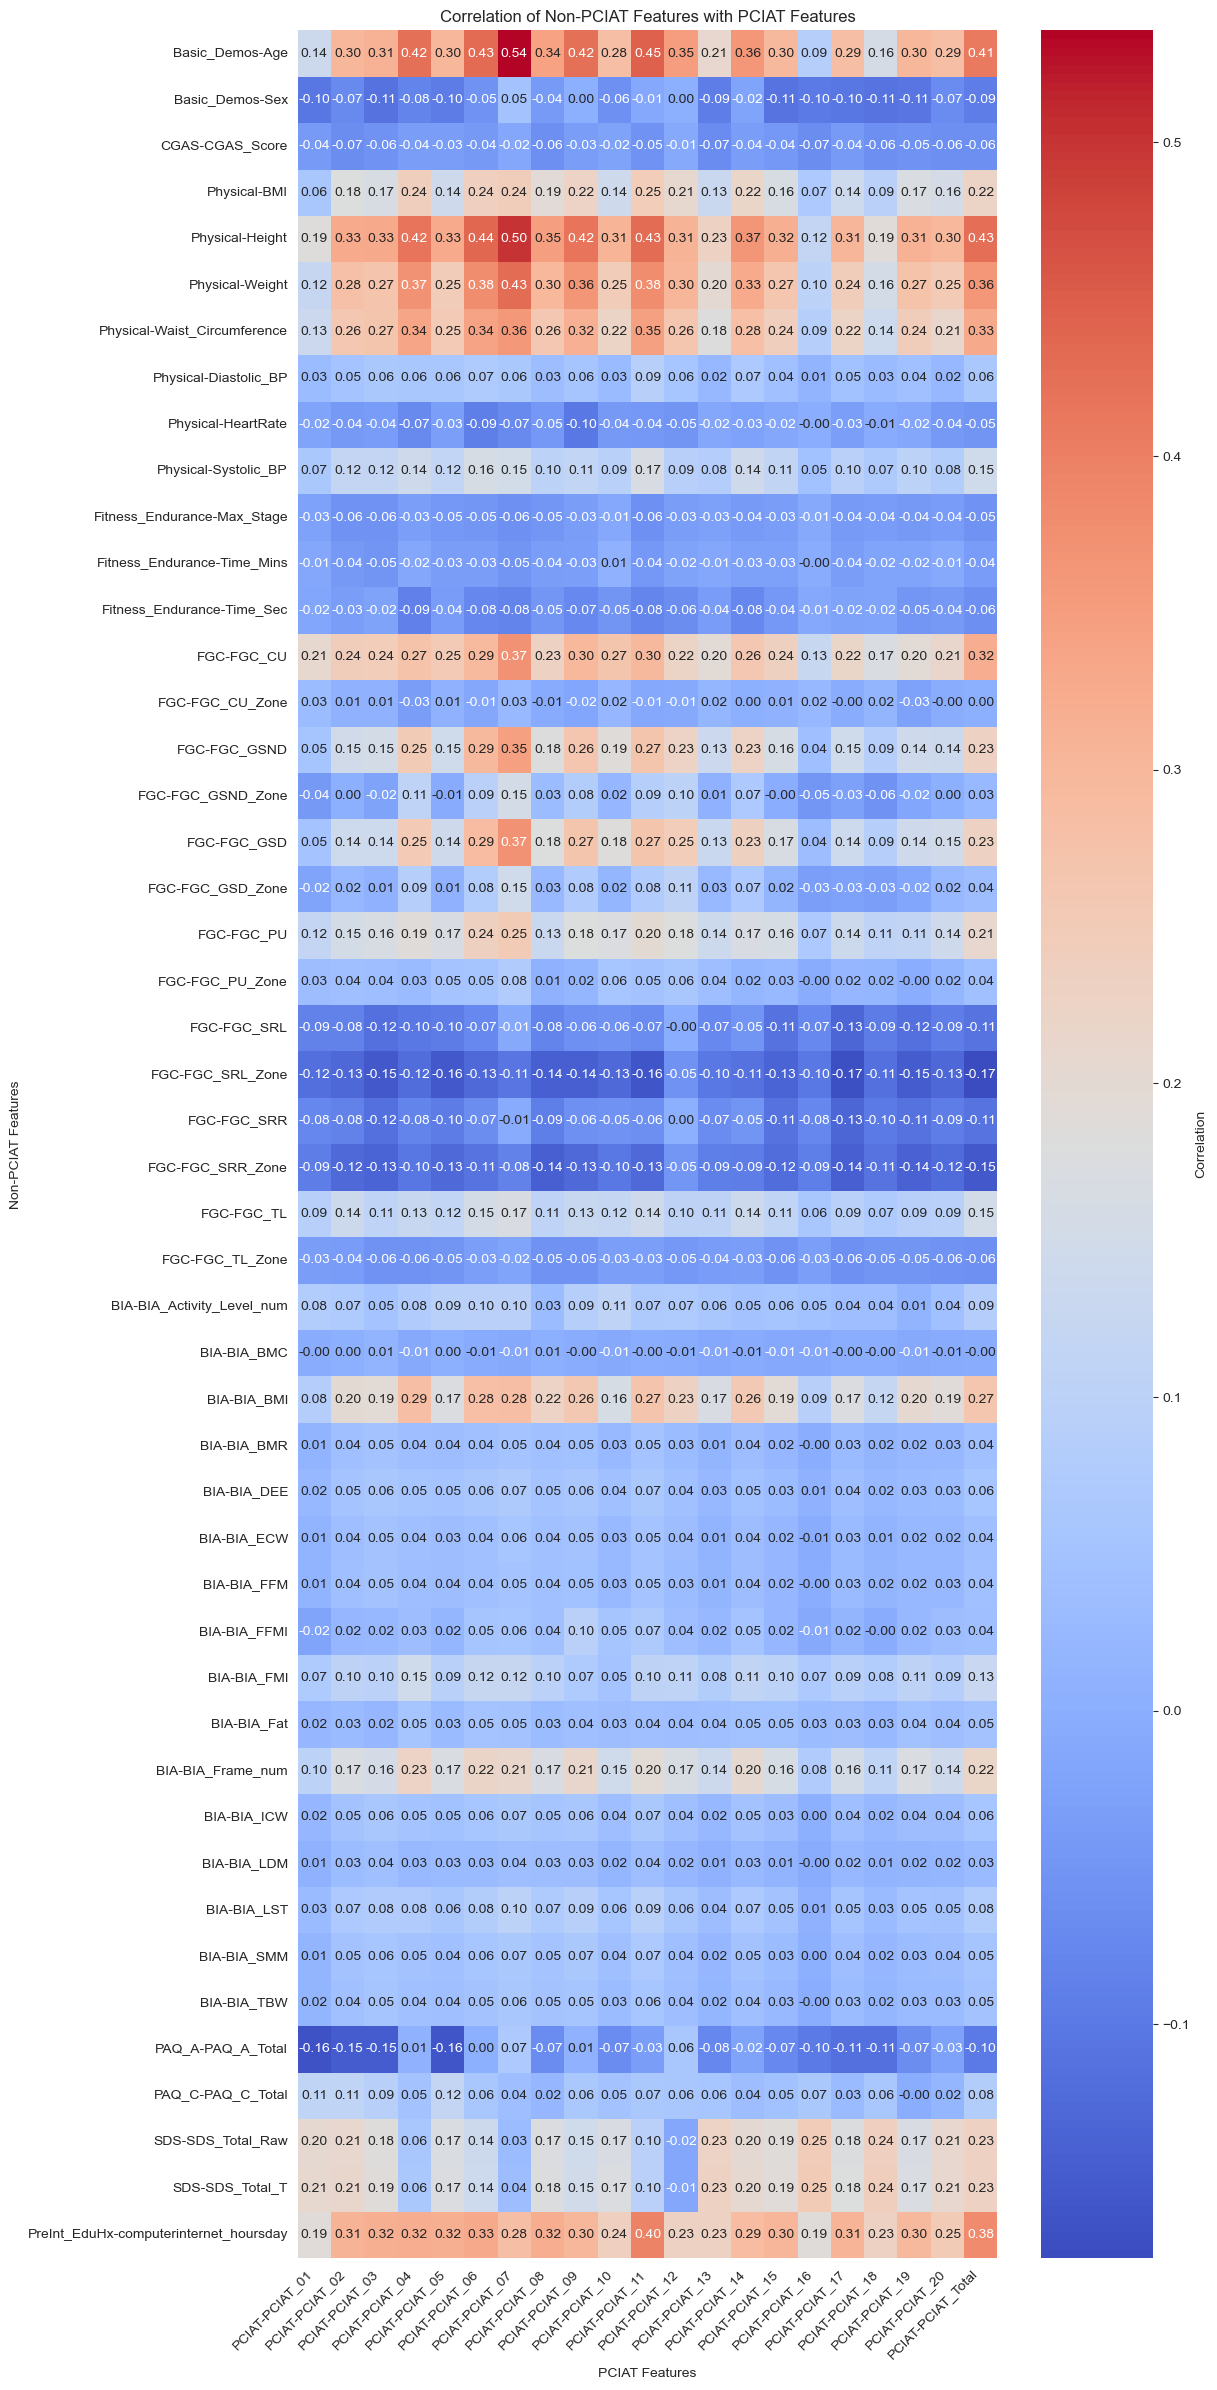

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify PCIAT and non-PCIAT features
pciat_features = [col for col in X_train_imputed.columns if 'PCIAT' in col]
non_pciat_features = [col for col in X_train_imputed.columns if 'PCIAT' not in col]

# Compute correlation matrix
correlation_matrix = X_train_imputed.corr()

# Extract relevant correlations
correlation_with_pciat = correlation_matrix.loc[non_pciat_features, pciat_features]

# Adjust plot size to accommodate all feature names
plt.figure(figsize=(max(len(pciat_features) * 0.5, 12), max(len(non_pciat_features) * 0.5, 12)))

# Plot heatmap
sns.heatmap(
    correlation_with_pciat, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    cbar_kws={'label': 'Correlation'},
    xticklabels=correlation_with_pciat.columns,
    yticklabels=correlation_with_pciat.index
)

# Adjust labels and title
plt.title('Correlation of Non-PCIAT Features with PCIAT Features')
plt.xlabel('PCIAT Features')
plt.ylabel('Non-PCIAT Features')

# Rotate labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [28]:
# Compute correlation matrix
correlation_matrix = X_train_imputed.corr()

# Identify PCIAT and non-PCIAT features
pciat_features = [col for col in X_train_imputed.columns if 'PCIAT' in col]
non_pciat_features = [col for col in X_train_imputed.columns if 'PCIAT' not in col]

# Extract relevant correlations
correlation_with_pciat = correlation_matrix.loc[non_pciat_features, pciat_features]

# Set the threshold for correlation
threshold = 0.25

# Find features that have a correlation greater than the threshold with any PCIAT feature
selected_features = correlation_with_pciat[(correlation_with_pciat.abs() > threshold).any(axis=1)].index

# Create a subset of the data with the selected features
subset_features = X_train_imputed[selected_features]

# Save the subset
subset_features.columns.tolist()


['Basic_Demos-Age',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'FGC-FGC_CU',
 'FGC-FGC_GSND',
 'FGC-FGC_GSD',
 'FGC-FGC_PU',
 'BIA-BIA_BMI',
 'SDS-SDS_Total_T',
 'PreInt_EduHx-computerinternet_hoursday']

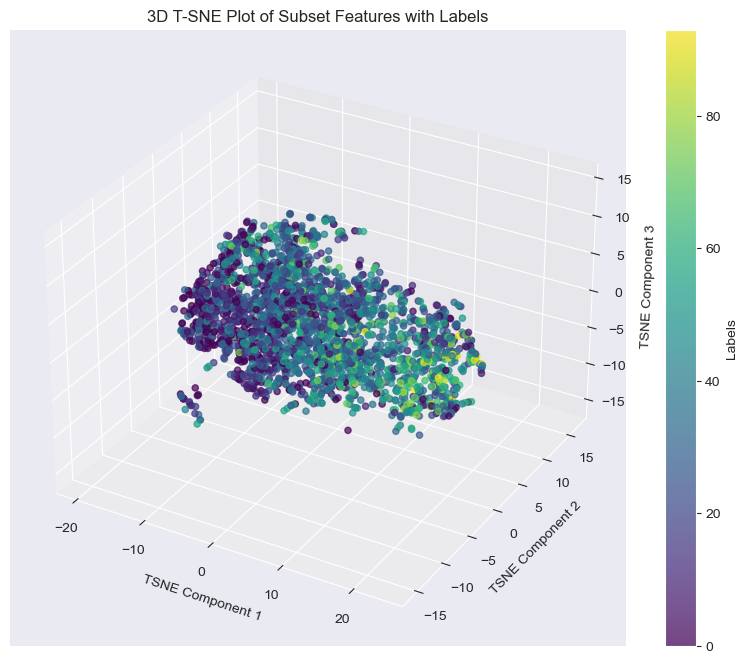

In [29]:
# Assuming 'y' is the variable containing labels for the data

# Perform T-SNE on the subset of features
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(subset_features)

# Extracting T-SNE components
tsne_x = tsne_results[:, 0]
tsne_y = tsne_results[:, 1]
tsne_z = tsne_results[:, 2]

# Plotting the 3D T-SNE with labels
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with label coloring
scatter = ax.scatter(tsne_x, tsne_y, tsne_z, c=y, cmap='viridis', alpha=0.7)
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Labels')

# Adding labels and title
ax.set_xlabel('TSNE Component 1')
ax.set_ylabel('TSNE Component 2')
ax.set_zlabel('TSNE Component 3')
ax.set_title('3D T-SNE Plot of Subset Features with Labels')

plt.show()


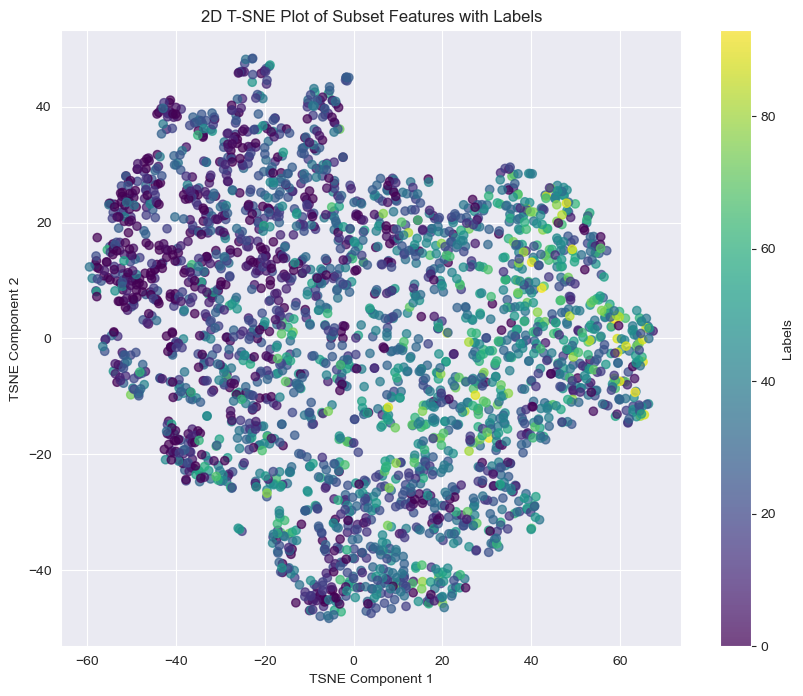

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd

# Assuming 'y' is the variable containing labels for the data

# Perform T-SNE on the subset of features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(subset_features)

# Extracting T-SNE components
tsne_x = tsne_results[:, 0]
tsne_y = tsne_results[:, 1]

# Plotting the 2D T-SNE with labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_x, tsne_y, c=y, cmap='viridis', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label('Labels')

# Adding labels and title
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('2D T-SNE Plot of Subset Features with Labels')

plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Reading train and test CSV files
train_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/train.csv')
test_df = pd.read_csv('/Users/ad53533/Desktop/Applied ML/Project/test.csv')

# Drop data that doesn't have 'sii'
train_df = train_df.dropna(subset=['sii'])
y = train_df['PCIAT-PCIAT_Total']
# Drop columns that contain 'PCIAT', because this is not in the test dataset
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='PCIAT')))]
# Drop columns that contain 'Season'
train_df = train_df[train_df.columns.drop(list(train_df.filter(regex='Season')))]
test_df = test_df[test_df.columns.drop(list(test_df.filter(regex='Season')))]

train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

X = train_df.drop(['sii'], axis=1)
y_sii = train_df['sii']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
# Impute missing values in the training data
knn_imputer = KNNImputer(n_neighbors=3)
X_train_imputed = pd.DataFrame(knn_imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns=X_test.columns)
X_test_imputed_test_set = pd.DataFrame(knn_imputer.transform(test_df), columns=test_df.columns)

# Standardize the imputed data
scaler = StandardScaler()  # or MinMaxScaler() if you prefer scaling between 0 and 1
X_train_imputed = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_imputed = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)
X_test_imputed_test_set = pd.DataFrame(scaler.transform(X_test_imputed_test_set), columns=X_test_imputed_test_set.columns)

In [32]:
train_df.head()

Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
0                5                0             51.0     16.877316   
1                9                0              NaN     14.035590   
2               10                1             71.0     16.648696   
3                9                0             71.0     18.292347   
5               13                1             50.0     22.279952   

   Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
0             46.0             50.8                           NaN   
1             48.0             46.0                          22.0   
2             56.5             75.6                           NaN   
3             56.0             81.6                           NaN   
5             59.5            112.2                           NaN   

   Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  ...  \
0                    NaN                 NaN                   NaN  ...   
1                   75.0                70.0                 122.0  ...   
2                   65.0                94.0                 117.0  ...   
3                   60.0                97.0                 117.0  ...   
5                   60.0                73.0                 102.0  ...   

   BIA-BIA_LDM  BIA-BIA_LST  BIA-BIA_SMM  BIA-BIA_TBW  PAQ_A-PAQ_A_Total  \
0      8.89536      38.9177      19.5413      32.6909                NaN   
1     14.97400      39.4497      15.4107      27.0552                NaN   
2          NaN          NaN          NaN          NaN                NaN   
3     16.77900      58.9338      26.4798      45.9966                NaN   
5     20.90200      79.6982      35.3804      63.1265                NaN   

   PAQ_C-PAQ_C_Total  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0                NaN                NaN              NaN   
1              2.340               46.0             64.0   
2              2.170               38.0             54.0   
3              2.451               31.0             45.0   
5              4.110               40.0             56.0   

   PreInt_EduHx-computerinternet_hoursday  sii  
0                                     3.0  2.0  
1                                     0.0  0.0  
2                                     2.0  0.0  
3                                     0.0  1.0  
5                                     0.0  1.0  

[5 rows x 49 columns]

In [33]:
test_df.head()

Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
0                5                0             51.0     16.877316   
1                9                0              NaN     14.035590   
2               10                1             71.0     16.648696   
3                9                0             71.0     18.292347   
4               18                1              NaN           NaN   

   Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
0             46.0             50.8                           NaN   
1             48.0             46.0                          22.0   
2             56.5             75.6                           NaN   
3             56.0             81.6                           NaN   
4              NaN              NaN                           NaN   

   Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  ...  \
0                    NaN                 NaN                   NaN  ...   
1                   75.0                70.0                 122.0  ...   
2                   65.0                94.0                 117.0  ...   
3                   60.0                97.0                 117.0  ...   
4                    NaN                 NaN                   NaN  ...   

   BIA-BIA_ICW  BIA-BIA_LDM  BIA-BIA_LST  BIA-BIA_SMM  BIA-BIA_TBW  \
0      24.4349      8.89536      38.9177      19.5413      32.6909   
1      21.0352     14.97400      39.4497      15.4107      27.0552   
2          NaN          NaN          NaN          NaN          NaN   
3      30.4041     16.77900      58.9338      26.4798      45.9966   
4          NaN          NaN          NaN          NaN          NaN   

   PAQ_A-PAQ_A_Total  PAQ_C-PAQ_C_Total  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0                NaN                NaN                NaN              NaN   
1                NaN              2.340               46.0             64.0   
2                NaN              2.170               38.0             54.0   
3                NaN              2.451               31.0             45.0   
4               1.04                NaN                NaN              NaN   

   PreInt_EduHx-computerinternet_hoursday  
0                                     3.0  
1                                     0.0  
2                                     2.0  
3                                     0.0  
4                                     NaN  

[5 rows x 48 columns]

In [34]:
import pandas as pd

# Assuming 'X_train_imputed' and 'X_test_imputed' are already defined DataFrames and 'subset_features' is a DataFrame
selected_columns = subset_features.columns.tolist()

X_train_subset = X_train_imputed[selected_columns]
X_test_subset = X_test_imputed[selected_columns]
X_train_imputed = X_train_subset
X_test_imputed = X_test_subset
X_test_subset_test_set = X_test_imputed_test_set[selected_columns]
X_test_imputed_test_set = X_test_subset_test_set

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Training the model
model = GradientBoostingClassifier()
model.fit(X_train_imputed, y_train)

# Predicting
y_pred = model.predict(X_test_imputed)
y_pred_sii = y_pred.copy()
y_pred_sii = np.select([y_pred <= 30, y_pred <= 49, y_pred <= 79], [0, 1, 2], default=3)

y_test_sii = y_test.copy()
y_test_sii = np.select([y_test <= 30, y_pred <= 49, y_pred <= 79], [0, 1, 2], default=3)
# Evaluation
print(classification_report(y_test_sii, y_pred_sii))


              precision    recall  f1-score   support

           0       0.68      0.77      0.73       336
           1       0.59      0.34      0.44       183
           2       0.46      1.00      0.63        24
           3       0.50      1.00      0.67         5

    accuracy                           0.64       548
   macro avg       0.56      0.78      0.62       548
weighted avg       0.64      0.64      0.62       548



In [36]:
cohen_kappa_score(y_test, y_pred, weights='quadratic')

NameError: name 'cohen_kappa_score' is not defined

Mean Squared Error: 0.583941605839416
Mean Absolute Error: 0.42700729927007297
Accuracy: 0.6423357664233577
Quadratic Weighted Kappa: 0.37564087957160763


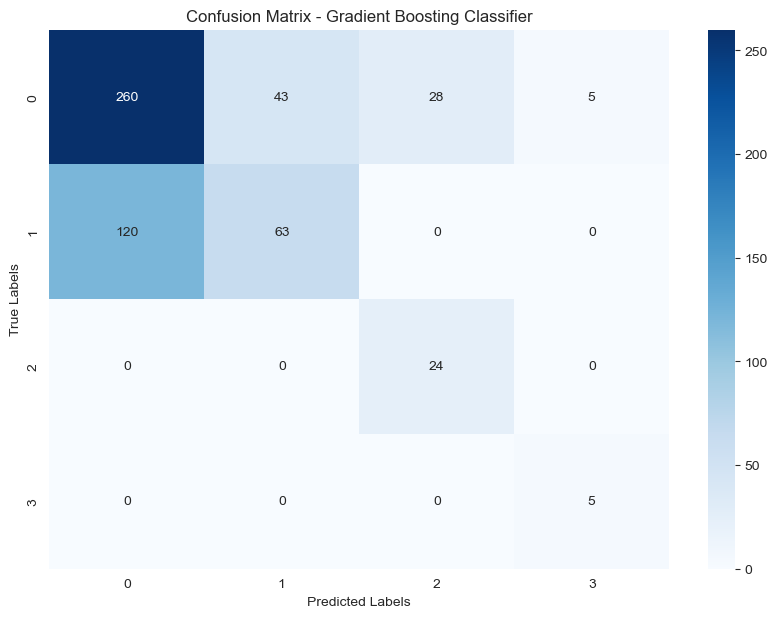

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, cohen_kappa_score
from imblearn.over_sampling import SMOTE
from mord import LogisticIT  # Ordinal Logistic Regression (LogisticIT model)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
y_test = y_test_sii
y_pred = y_pred_sii
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Accuracy: {accuracy}')
print(f'Quadratic Weighted Kappa: {kappa}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [38]:
import numpy as np
test_df

Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
0                 5                0             51.0     16.877316   
1                 9                0              NaN     14.035590   
2                10                1             71.0     16.648696   
3                 9                0             71.0     18.292347   
4                18                1              NaN           NaN   
5                13                1             50.0     22.279952   
6                10                0              NaN     19.660760   
7                10                1              NaN     16.861286   
8                15                0              NaN           NaN   
9                19                1              NaN           NaN   
10               11                1              NaN           NaN   
11               11                0             66.0           NaN   
12               13                0              NaN     21.079065   
13               12                0              NaN     15.544111   
14               12                0              NaN           NaN   
15                7                0             51.0     29.315775   
16                5                1             80.0     17.284504   
17               10                1              NaN     19.893157   
18                6                0             60.0     30.094649   
19               10                0              NaN           NaN   

    Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
0             46.00             50.8                           NaN   
1             48.00             46.0                          22.0   
2             56.50             75.6                           NaN   
3             56.00             81.6                           NaN   
4               NaN              NaN                           NaN   
5             59.50            112.2                           NaN   
6             55.00             84.6                           NaN   
7             59.25             84.2                          27.0   
8               NaN              NaN                           NaN   
9               NaN              NaN                           NaN   
10              NaN              NaN                           NaN   
11              NaN              NaN                           NaN   
12            57.75            100.0                           NaN   
13            60.00             79.6                          24.0   
14              NaN              NaN                           NaN   
15            54.00            121.6                           NaN   
16            44.00             47.6                           NaN   
17            55.00             85.6                          30.0   
18            37.50             60.2                          24.0   
19              NaN              NaN                           NaN   

    Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  ...  \
0                     NaN                 NaN                   NaN  ...   
1                    75.0                70.0                 122.0  ...   
2                    65.0                94.0                 117.0  ...   
3                    60.0                97.0                 117.0  ...   
4                     NaN                 NaN                   NaN  ...   
5                    60.0                73.0                 102.0  ...   
6                   123.0                83.0                 163.0  ...   
7                    71.0                90.0                 116.0  ...   
8                     NaN                 NaN                   NaN  ...   
9                     NaN                 NaN                   NaN  ...   
10                    NaN                 NaN                   NaN  ...   
11                    NaN                 NaN                   NaN  ...   
12                   63.0                79.0        

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encoun

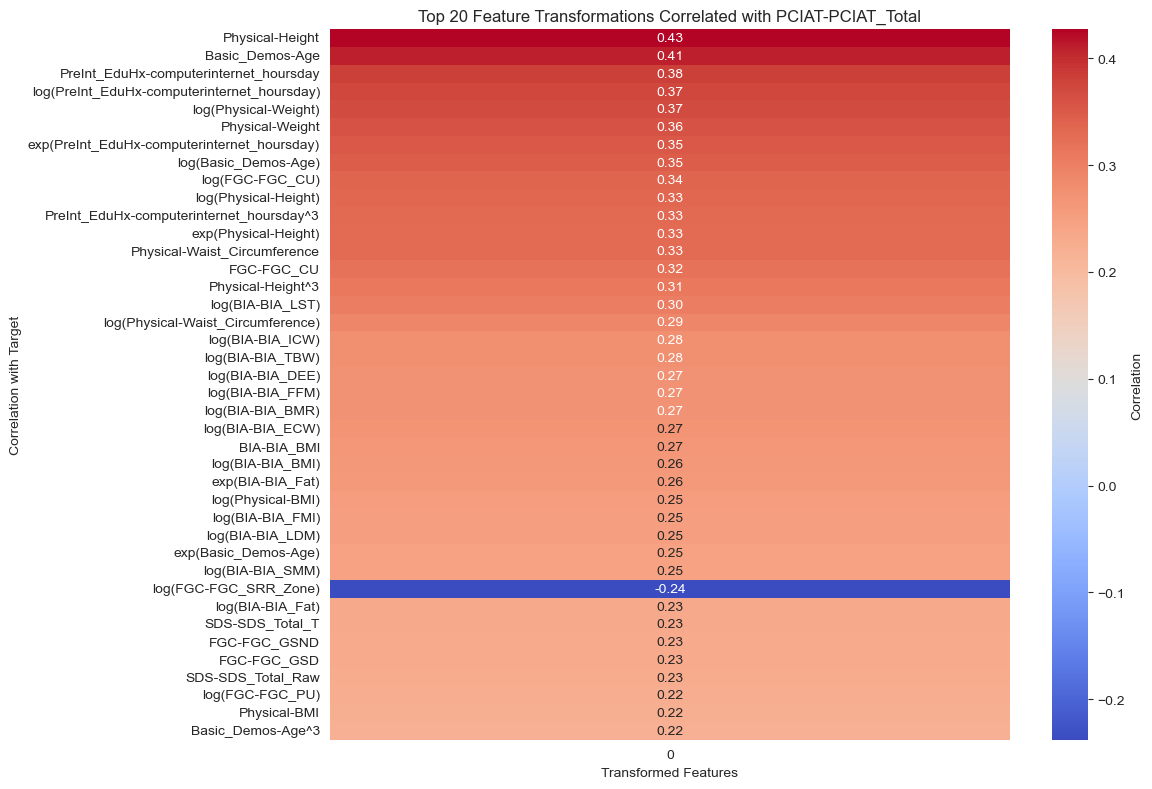

Top 20 Correlated Features and Transformations:
Physical-Height                                0.427082
Basic_Demos-Age                                0.409559
PreInt_EduHx-computerinternet_hoursday         0.381186
log(PreInt_EduHx-computerinternet_hoursday)    0.372927
log(Physical-Weight)                           0.369161
Physical-Weight                                0.361355
exp(PreInt_EduHx-computerinternet_hoursday)    0.352254
log(Basic_Demos-Age)                           0.347481
log(FGC-FGC_CU)                                0.338063
log(Physical-Height)                           0.334882
PreInt_EduHx-computerinternet_hoursday^3       0.331669
exp(Physical-Height)                           0.329980
Physical-Waist_Circumference                   0.328934
FGC-FGC_CU                                     0.320330
Physical-Height^3                              0.310307
log(BIA-BIA_LST)                               0.303464
log(Physical-Waist_Circumference)              0.291906


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target feature and exclude PCIAT features
target_feature = 'PCIAT-PCIAT_Total'
non_pciat_features = [col for col in X_train_imputed.columns if 'PCIAT' not in col]

# Create a DataFrame to store transformed features
transformed_features = pd.DataFrame(index=X_train_imputed.index)

# Apply transformations
for feature in non_pciat_features:
    
    transformed_features[f"{feature}"] = X_train_imputed[feature]
    transformed_features[f"{feature}^2"] = X_train_imputed[feature] ** 2
    transformed_features[f"{feature}^3"] = X_train_imputed[feature] ** 3
    transformed_features[f"log({feature})"] = np.log1p(X_train_imputed[feature])  # log1p to handle zero/negative values
    transformed_features[f"exp({feature})"] = np.exp(X_train_imputed[feature])

# Combine transformed features with the target
transformed_features[target_feature] = X_train_imputed[target_feature]

# Compute correlations with the target feature
correlation_with_target = transformed_features.corr()[target_feature].drop(target_feature)

# Sort by absolute correlation
top_correlations = correlation_with_target.abs().sort_values(ascending=False).head(40)

# Filter for the top 20 correlated features
top_features = top_correlations.index

# Plot heatmap for top correlations
plt.figure(figsize=(12, 8))
sns.heatmap(
    transformed_features[top_features].corrwith(transformed_features[target_feature]).to_frame(),
    annot=True,
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation'},
    fmt=".2f"
)

# Adjust labels and title
plt.title(f'Top 20 Feature Transformations Correlated with {target_feature}')
plt.xlabel('Transformed Features')
plt.ylabel('Correlation with Target')
plt.tight_layout()
plt.show()

# Print the top 20 correlations
print("Top 20 Correlated Features and Transformations:")
print(top_correlations)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define data and target feature
non_pciat_features = [col for col in X_train_imputed.columns if 'PCIAT' not in col]
target_feature = 'PCIAT-PCIAT_Total'

# Create DataFrame to store new feature multiplications
transformed_features = pd.DataFrame(index=X_train_imputed.index)

# Generate pairwise feature multiplications
for i, feature1 in enumerate(non_pciat_features):
    for feature2 in non_pciat_features[i+1:]:
        transformed_features[f"{feature1}*{feature2}"] = X_train_imputed[feature1] * X_train_imputed[feature2]
        transformed_features[f"{feature1}+{feature2}"] = X_train_imputed[feature1] + X_train_imputed[feature2]
# Combine with target feature
transformed_features[target_feature] = X_train_imputed[target_feature]

# Compute correlations
correlation_with_target = transformed_features.corr()[target_feature].drop(target_feature)

# Sort by absolute correlation and get top 20
top_correlations = correlation_with_target.abs().sort_values(ascending=False).head(20)
top_features = top_correlations.index

# Print top 20 correlations
print("Top 20 Correlated Features and Transformations:")
print(top_correlations)

/var/folders/kf/59lqk6h51mj0n58qklnhrm580000gq/T/ipykernel_23140/4250593606.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_features[f"{feature1}*{feature2}"] = X_train_imputed[feature1] * X_train_imputed[feature2]
/var/folders/kf/59lqk6h51mj0n58qklnhrm580000gq/T/ipykernel_23140/4250593606.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  transformed_features[f"{feature1}+{feature2}"] = X_train_imputed[feature1] + X_train_imputed[feature2]
/var/folders/kf/59lqk6h51mj0n58qklnhrm580000gq/T/ipykernel_23140/42505

Top 20 Correlated Features and Transformations:
Physical-Height+PreInt_EduHx-computerinternet_hoursday                 0.485242
Basic_Demos-Age+PreInt_EduHx-computerinternet_hoursday                 0.468113
Physical-Height+SDS-SDS_Total_T                                        0.464957
Physical-Height+SDS-SDS_Total_Raw                                      0.462491
FGC-FGC_CU+PreInt_EduHx-computerinternet_hoursday                      0.457397
Basic_Demos-Age+SDS-SDS_Total_T                                        0.455752
Basic_Demos-Age+SDS-SDS_Total_Raw                                      0.453247
Physical-Weight+PreInt_EduHx-computerinternet_hoursday                 0.447794
Basic_Demos-Age+Physical-Height                                        0.431799
Physical-Waist_Circumference+PreInt_EduHx-computerinternet_hoursday    0.430537
Physical-Height+FGC-FGC_CU                                             0.430132
Basic_Demos-Age+FGC-FGC_CU                                             0

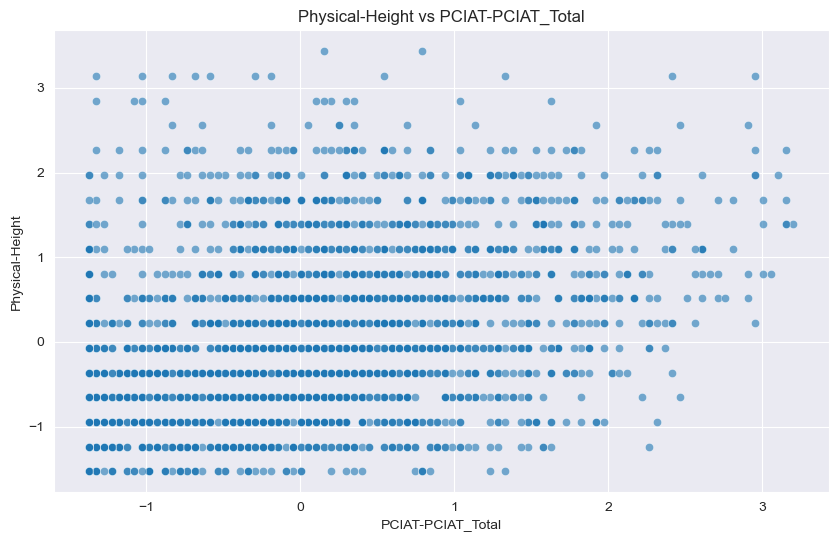

In [47]:
import matplotlib.pyplot as plt

# Assuming transformed_features and target_feature are already defined DataFrames and target column
target_feature = 'PCIAT-PCIAT_Total'

plt.figure(figsize=(10, 6))
plt.scatter(transformed_features[target_feature], transformed_features['Basic_Demos-Age'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.ylabel('Physical-Height')
plt.xlabel('PCIAT-PCIAT_Total')
plt.title('Physical-Height vs PCIAT-PCIAT_Total')
plt.grid(True)
plt.show()

In [40]:
y

0       55.0
1        0.0
2       28.0
3       44.0
5       34.0
        ... 
3953    22.0
3954    33.0
3955    32.0
3957    31.0
3958    19.0
Name: PCIAT-PCIAT_Total, Length: 2736, dtype: float64